# Part I - (PISA Data Analysis)

## by (Swathi)

### Introduction

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. This survey examines

how well students have learned the school curriculum? how well prepared they are for life beyond school?

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

## Preliminary Wrangling

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [5]:
df = pd.read_csv('pisa2012.csv', encoding = "ISO-8859-1",low_memory=False)
df.head(1)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13


In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
df.shape

(485490, 636)

## What is the structure of your dataset?
There are 11383 records and 636 columns in the original dataset. How ever I am going to select few columns only and perform my analysis.

## What is/are the main feature(s) of interest in your dataset?
Our main interest is to find the factors which influence the scores of students in math science and reading.

## What features in the dataset do you think will help support your investigation into your feature(s) of interest?
Looking at the data dictionary for this data, I ve selected features related to birthdate,parents schoolong and jobs,immigration status,gadgets, and their ambience (i.e, Teachers encouragement towards students)

In [8]:
df.drop(df.columns[0], axis = 1, inplace = True)
df_new=df.iloc[:,np.r_[0, 9:12, 26, 31, 32, 37, 38, 60:63, 65, 140, 178, 192:194, 196, 448, 500:505, 540:550]]
df_new.shape

(485490, 34)

In [9]:
df_new.rename(columns={'CNT':'Country', 'ST03Q01':'Birth_Month', 
                                'ST03Q02':'Birth_Year', 'ST04Q01':'Gender', 'ST13Q01':'Mother_Schooling', 
                                'ST15Q01':'Mother_Job', 'ST17Q01':'Father_Schooling', 'ST19Q01':'Father_Job', 
                                'ST20Q01':'Birth_Country', 'ST27Q01':'No_Cellphones', 'ST27Q02':'No_TVs', 
                                'ST27Q03':'No_Computers', 'ST28Q01':'No_Books', 'ST57Q01':'Homework_Study_Time', 
                                'ST72Q01':'Class_Size', 'ST79Q01':'Teacher_Sets_Goals', 
                                'ST79Q02':'Teacher_Encourages_Thinking', 'ST79Q05':'Teacher_Gives_Feedback', 
                                'IMMIG':'Immigration_Status'},inplace=True)

In [10]:
df_new.columns

Index(['Country', 'Birth_Month', 'Birth_Year', 'Gender', 'Mother_Schooling',
       'Mother_Job', 'Father_Schooling', 'Father_Job', 'Birth_Country',
       'No_Cellphones', 'No_TVs', 'No_Computers', 'No_Books',
       'Homework_Study_Time', 'Class_Size', 'Teacher_Sets_Goals',
       'Teacher_Encourages_Thinking', 'Teacher_Gives_Feedback',
       'Immigration_Status', 'PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH',
       'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
       'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE'],
      dtype='object')

In [11]:
# Now we can get an average of the five assessments for Maths, Reading and Science 
# We can also get the total of the three averages and store them in one variable

df_new['AVG_Maths_Score'] = (df_new['PV1MATH'] + df_new['PV2MATH'] + df_new['PV3MATH'] + df_new['PV4MATH'] + df_new['PV5MATH']) / 5
df_new['Avg_Reading_Score'] = (df_new['PV1READ'] + df_new['PV2READ'] + df_new['PV3READ'] + df_new['PV4READ'] + df_new['PV5READ']) / 5
df_new['Avg_Science_Score'] = (df_new['PV1SCIE'] + df_new['PV2SCIE'] + df_new['PV3SCIE'] + df_new['PV4SCIE'] + df_new['PV5SCIE']) / 5
df_new['Total_Score'] = df_new['AVG_Maths_Score'] + df_new['Avg_Reading_Score'] + df_new['Avg_Science_Score']



In [12]:
#Dropping the redundant data
df_new.drop(columns=['PV1MATH', 'PV2MATH', 'PV3MATH', 'PV4MATH',
       'PV5MATH', 'PV1READ', 'PV2READ', 'PV3READ', 'PV4READ', 'PV5READ',
       'PV1SCIE', 'PV2SCIE', 'PV3SCIE', 'PV4SCIE', 'PV5SCIE',],inplace=True)

In [13]:
#checking for the country values
df_new.Country.unique()

array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
       'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
       'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
       'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
       'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
       'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
       'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
       'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
       'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
       'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
       'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
       'Massachusetts (USA)', 'Romania', 'Russian Federation',
       'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
       'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
       'United States of America', 'Vietn

In [14]:
# Country Variable has different names hence making it consistent
df_new.loc[df_new.Country.str.contains('USA'),'Country']='USA'
df_new.loc[df_new.Country.str.contains('Chin'),'Country'] = 'China'
df_new['Country'].replace(['Perm(Russian Federation)', 'Russian Federation'],'Russia',inplace=True)

In [15]:
#Checking for the column values
df_new.Mother_Job.unique()
df_new.Father_Job.unique()

array(['Working part-time <for pay>', 'Working full-time <for pay> ',
       'Not working, but looking for a job',
       'Other (e.g. home duties, retired) ', nan], dtype=object)

In [16]:
#Categeorize Mother and Father Jobs
df_new['Mother_Job'] = df_new['Mother_Job'].replace(['Working full-time <for pay> ','Working part-time <for pay>','Not working, but looking for a job ','Other (e.g. home duties, retired) '],['Full-time','Part-time','Looking','Other'])
df_new['Father_Job'] = df_new['Father_Job'].replace(['Working full-time <for pay> ','Working part-time <for pay>','Not working, but looking for a job ','Other (e.g. home duties, retired) '],['Full-time','Part-time','Looking','Other'])


In [17]:
#Change Mother and Father Jobs to ordinal data
classes=['Other','Looking','Part-time','Full-time']
jobtypes=pd.api.types.CategoricalDtype(ordered = True, categories = classes)
df_new['Mother_Job']=df_new['Mother_Job'].astype(jobtypes) 
df_new['Father_Job']=df_new['Father_Job'].astype(jobtypes) 

In [18]:
#Checking if the changes are reflected 
df_new['Mother_Job'].unique()
df_new['Father_Job'].unique()

['Part-time', 'Full-time', NaN, 'Other']
Categories (4, object): ['Other' < 'Looking' < 'Part-time' < 'Full-time']

In [19]:
#Checking for the column values
df_new['Father_Schooling'].unique()
df_new['Mother_Schooling'].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
       'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
       '<ISCED level 1> ', nan], dtype=object)

In [20]:
#Categeorize Mother and Father Jobs
df_new['Mother_Schooling'] = df_new['Mother_Schooling'].replace(['<ISCED level 3A> ','<ISCED level 3B, 3C> ','<ISCED level 2> ','<ISCED level 1> ','She did not complete <ISCED level 1> '],['Level 3A','Level 3B or 3C','Level 2','Level 1','< Level 1'])
df_new['Father_Schooling'] = df_new['Father_Schooling'].replace(['<ISCED level 3A> ','<ISCED level 3B, 3C> ','<ISCED level 2> ','<ISCED level 1> ','He did not complete <ISCED level 1> '],['Level 3A','Level 3B or 3C','Level 2','Level 1','< Level 1'])


In [21]:
#Checking if the changes are reflected 
df_new['Mother_Schooling'].unique()
df_new['Father_Schooling'].unique()

array(['Level 3A', 'Level 3B or 3C', 'Level 2', '< Level 1', nan,
       'Level 1'], dtype=object)

In [22]:
#Mother and Father Schooling to ordinal data
school_levels=['< Level 1','Level 1','Level 2','Level 3A','Level 3B or 3C']
schooling_types=pd.api.types.CategoricalDtype(ordered = True, categories = school_levels)
df_new['Mother_Schooling']=df_new['Mother_Schooling'].astype(schooling_types) 
df_new['Father_Schooling']=df_new['Father_Schooling'].astype(schooling_types)

In [23]:
#Checking for the column values
df_new['No_Computers'].unique()
df_new['No_Cellphones'].unique()
df_new['No_TVs'].unique()

array(['One', 'Three or more', 'Two', nan, 'None'], dtype=object)

In [24]:
# Change number of cellphones, TVs and computers to ordinal data

no_classes = ['None', 'One', 'Two', 'Three or more']
nclasses = pd.api.types.CategoricalDtype(ordered = True, categories = no_classes)
no_vars = ['No_Cellphones', 'No_TVs', 'No_Computers']

for i in range(len(no_vars)):
    df_new[no_vars[i]] = df_new[no_vars[i]].astype(nclasses)

In [25]:
#Checking if the changes are reflected 
df_new['No_Computers'].unique()
df_new['No_Cellphones'].unique()
df_new['No_TVs'].unique()

['One', 'Three or more', 'Two', NaN, 'None']
Categories (4, object): ['None' < 'One' < 'Two' < 'Three or more']

In [26]:
df_new['No_Books'].unique()

array(['0-10 books ', '201-500 books ', 'More than 500 books',
       '11-25 books ', '101-200 books ', '26-100 books ', nan],
      dtype=object)

In [27]:
df_new['No_Books'] = df_new['No_Books'].replace(['0-10 books ','11-25 books ','26-100 books ','101-200 books ','201-500 books ','More than 500 books'],['0-10','11-25','26-100','101-200','201-500','500+'])
 

In [28]:
#Change No of Books to ordinal data
book_classes = ['0-10', '11-25', '26-100', '101-200', '201-500', '500+']
bclasses = pd.api.types.CategoricalDtype(ordered = True, categories = book_classes)
df_new['No_Books'] = df_new['No_Books'].astype(bclasses)

In [29]:
df_new['Teacher_Sets_Goals'].unique()


array(['Never or Hardly Ever', nan, 'Some Lessons', 'Every Lesson',
       'Most Lessons'], dtype=object)

In [30]:
df_new['Teacher_Encourages_Thinking'].unique()


array(['Most Lessons', nan, 'Every Lesson', 'Some Lessons',
       'Never or Hardly Ever'], dtype=object)

In [31]:
df_new['Teacher_Gives_Feedback'].unique()

array(['Most Lessons', nan, 'Every Lesson', 'Some Lessons',
       'Never or Hardly Ever'], dtype=object)

In [32]:
#Changing columns to ordinal data
teach_classes = ['Never or Hardly Ever', 'Some Lessons', 'Most Lessons', 'Every Lesson']
tclasses = pd.api.types.CategoricalDtype(ordered = True, categories = teach_classes)
t_vars = ['Teacher_Sets_Goals', 'Teacher_Encourages_Thinking', 'Teacher_Gives_Feedback']

for i in range(len(t_vars)):
    df_new[t_vars[i]] = df_new[t_vars[i]].astype(tclasses)

In [33]:
df_new['Birth_Country'].unique()

array(['Country of test', nan, 'Other country'], dtype=object)

In [34]:
df_new.Homework_Study_Time = df_new['Homework_Study_Time'].replace('nan','0.') 


In [35]:
#df_new[df_new['Homework_Study_Time']=='nan']
#df_new['Homework_Study_Time']=df_new['Homework_Study_Time'].astype(int)

In [36]:
df_new.sample(199)

,Country,Birth_Month,Birth_Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Homework_Study_Time,Class_Size,Teacher_Sets_Goals,Teacher_Encourages_Thinking,Teacher_Gives_Feedback,Immigration_Status,AVG_Maths_Score,Avg_Reading_Score,Avg_Science_Score,Total_Score
140398,Denmark,9,1996,Male,Level 2,Other,Level 2,Full-time,Country of test,Three or more,...,3.0,18.0,NaN,NaN,NaN,Native,405.91214,405.28480,418.72434,1229.92128
432633,Serbia,5,1996,Female,Level 3A,Part-time,Level 3B or 3C,Full-time,Country of test,Two,...,NaN,NaN,Every Lesson,Every Lesson,Some Lessons,Native,502.11094,506.93266,498.26556,1507.30916
440351,Slovenia,10,1996,Female,Level 3B or 3C,Full-time,Level 3A,Full-time,Country of test,Three or more,...,1.0,24.0,NaN,NaN,NaN,Native,515.89808,511.85740,525.40098,1553.15646
353109,Montenegro,9,1996,Male,Level 3A,Other,Level 3A,Full-time,Country of test,Three or more,...,2.0,NaN,NaN,NaN,NaN,Native,431.92864,423.80970,411.54420,1267.28254
46540,Belgium,11,1996,Female,Level 3A,Other,Level 3A,Other,Country of test,Three or more,...,4.0,21.0,NaN,NaN,NaN,Native,518.46858,559.43656,494.62886,1572.53400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421856,Russia,6,1996,Male,Level 3B or 3C,Other,Level 3A,Full-time,Country of test,Three or more,...,10.0,25.0,Every Lesson,Most Lessons,Some Lessons,Native,559.36284,526.45870,526.42672,1612.24826
235730,Israel,10,1996,Female,Level 3B or 3C,Looking,Level 3B or 3C,Part-time,Other country,Two,...,3.0,NaN,NaN,NaN,NaN,Native,362.99268,430.12288,381.14510,1174.26066
468321,Turkey,7,1996,Male,Level 2,Other,Level 3A,Full-time,Country of test,Three or more,...,18.0,32.0,Most Lessons,Every Lesson,Every Lesson,Native,605.63174,595.18540,581.72322,1782.54036
464314,Tunisia,11,1996,Male,< Level 1,Other,Level 1,Full-time,Country of test,Two,...,NaN,NaN,Most Lessons,Some Lessons,Every Lesson,Native,382.54402,376.41476,423.38680,1182.34558


In [37]:
df_new['Birth_Month'].unique()

array([ 2,  9,  8, 10,  3,  6,  5,  4,  7,  1, 12, 11, 99])

In [38]:
# Birth_Month of 99 is not valid hence replacing with Nan

df_new['Birth_Month'] = df_new['Birth_Month'].replace(99, np.nan)
df_new['Birth_Month'].unique()

array([ 2.,  9.,  8., 10.,  3.,  6.,  5.,  4.,  7.,  1., 12., 11., nan])

In [39]:
 df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   Country                      485490 non-null  object  
 1   Birth_Month                  485374 non-null  float64 
 2   Birth_Year                   485490 non-null  int64   
 3   Gender                       485490 non-null  object  
 4   Mother_Schooling             457979 non-null  category
 5   Mother_Job                   467751 non-null  category
 6   Father_Schooling             443261 non-null  category
 7   Father_Job                   429788 non-null  category
 8   Birth_Country                476363 non-null  object  
 9   No_Cellphones                477079 non-null  category
 10  No_TVs                       476548 non-null  category
 11  No_Computers                 473459 non-null  category
 12  No_Books                     473765 non-null

In [40]:
#Check if there are any duplicated records in the data set
df_new[df_new.duplicated()]

,Country,Birth_Month,Birth_Year,Gender,Mother_Schooling,Mother_Job,Father_Schooling,Father_Job,Birth_Country,No_Cellphones,...,Homework_Study_Time,Class_Size,Teacher_Sets_Goals,Teacher_Encourages_Thinking,Teacher_Gives_Feedback,Immigration_Status,AVG_Maths_Score,Avg_Reading_Score,Avg_Science_Score,Total_Score


Data Is Clean and Ready to be worked on for analysis

# Univariate Analysis

Analyze all the categeorical and numerical Variables for their distributions

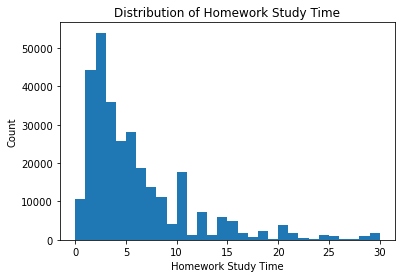

In [41]:

# Set the bins size
bins = np.arange(0, df_new['Homework_Study_Time'].max()+1, 1);

plt.hist(data = df_new, x = 'Homework_Study_Time', bins = bins); 

# Set the plot's title and labels
plt.title("Distribution of Homework Study Time")
plt.xlabel("Homework Study Time")
plt.ylabel('Count');

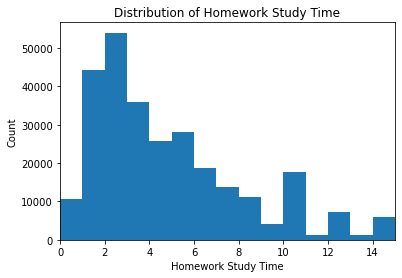

In [42]:
# Set a limit of 15 to the x-axis 
bins = np.arange(0, df_new['Homework_Study_Time'].max()+1, 1);
plt.hist(data = df_new, x = 'Homework_Study_Time', bins = bins); 

plt.xlim((0,15));
# Set the plot's title and labels
plt.title("Distribution of Homework Study Time")
plt.xlabel("Homework Study Time")
plt.ylabel('Count');

Distribution of Homework Study Time: Most of the students spend around 3 hours of homework time outside school and  most of the data is rightly skewed.

Analyzing the Categeorical Variables No_Books,No_Computers,No_TVs,Teacher_Encourages_Thinking

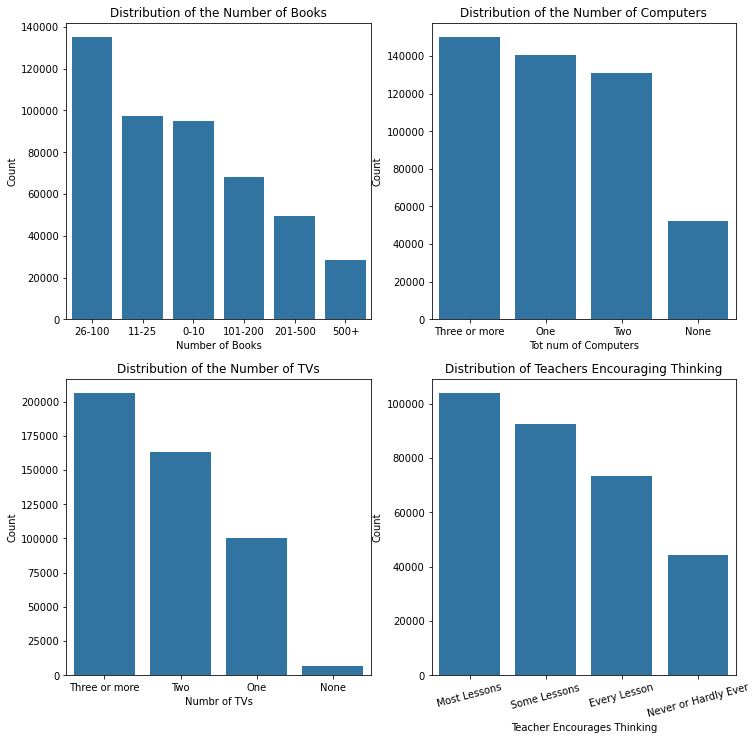

In [43]:
plt.figure(figsize=(12,12))
base_color=sb.color_palette()[0]
plt.subplot(2,2,1)
gen_order = df_new['No_Books'].value_counts().index
sb.countplot(data = df_new, x = 'No_Books', color=base_color, order=gen_order);
# Set the plot's title and labels
plt.title("Distribution of the Number of Books")
plt.xlabel("Number of Books")
plt.ylabel('Count');

plt.subplot(2,2,2)
gen_order = df_new['No_Computers'].value_counts().index
sb.countplot(data = df_new, x = 'No_Computers', color=base_color, order=gen_order);
# Set the plot's title and labels
plt.title("Distribution of the Number of Computers")
plt.xlabel("Tot num of Computers")
plt.ylabel('Count');

plt.subplot(2,2,3)
gen_order = df_new['No_TVs'].value_counts().index
sb.countplot(data = df_new, x = 'No_TVs', color=base_color, order=gen_order);
# Set the plot's title and labels
plt.title("Distribution of the Number of TVs")
plt.xlabel("Numbr of TVs")
plt.ylabel('Count');

plt.subplot(2,2,4)
gen_order = df_new['Teacher_Encourages_Thinking'].value_counts().index
sb.countplot(data = df_new, x = 'Teacher_Encourages_Thinking', color=base_color, order=gen_order);
# Rotate the x-axis ticks so that they don't overlap
plt.xticks(rotation = 15)
# Set the plot's title and labels
plt.title("Distribution of Teachers Encouraging Thinking")
plt.xlabel("Teacher Encourages Thinking")
plt.ylabel('Count');

From the above plots, Here are my conclusions:
1. Many students have 26 - 100 books and Most of the households have 3 or more Televisions.
2. There are few households with less number of computers
3. Many Teachers encourage students to think on their own for most of the lessons. 

Analyzing the distribution of numeric variables in data. AVG_Maths_Score,Avg_Reading_Score,Avg_Science_Score,Total_Score

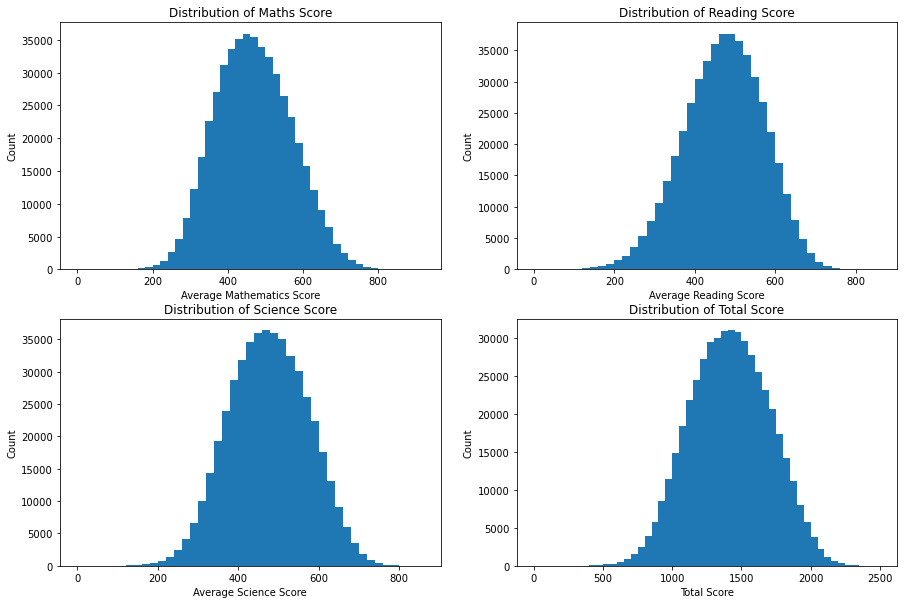

In [59]:
# Set the bins size
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)

bins = np.arange(0, df_new['AVG_Maths_Score'].max()+20, 20);

plt.hist(data = df_new, x = 'AVG_Maths_Score', bins = bins);  

# Set the plot's title and labels
plt.title("Distribution of Maths Score")
plt.xlabel("Average Mathematics Score")
plt.ylabel('Count');

plt.subplot(2,2,2)
#Histogram of the reading scores

# Set the bins size
bins = np.arange(0, df_new['Avg_Reading_Score'].max()+20, 20);

plt.hist(data = df_new, x = 'Avg_Reading_Score', bins = bins); 

# Set the plot's title and labels
plt.title("Distribution of Reading Score")
plt.xlabel("Average Reading Score")
plt.ylabel('Count');


#Histogram of the science scores
plt.subplot(2,2,3)
# Set the bins size
bins = np.arange(0, df_new['Avg_Science_Score'].max()+20, 20);

plt.hist(data = df_new, x = 'Avg_Science_Score', bins = bins);

# Set the plot's title and labels
plt.title("Distribution of Science Score")
plt.xlabel("Average Science Score")
plt.ylabel('Count');


#Histogram of the total scores
plt.subplot(2,2,4)
# Set the bins size
bins = np.arange(0, df_new['Total_Score'].max()+50, 50);

plt.hist(data = df_new, x = 'Total_Score', bins = bins);

# Set the plot's title and labels
plt.title("Distribution of Total Score")
plt.xlabel("Total Score")
plt.ylabel('Count');

Average Maths score,Average Reading Score, Average Science Score and total scores are normally distributed.

## Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

 The maths, reading, science & total scores all had a normal distribution. As for the homework study time, the plot was highly skewed to the right. Few students have a study time close to 30 which is quite big(could be faulty information) 
 
I set the limit of study time to 15 and recreated a distribution. 

## Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Cleaned the format of the Country variable. Furthermore, I made sure the categorical data that had an order were ordere, so that they can be plotted in order.Found birth months of 99 so I set that data to null.

## Bivariate Exploration


##### Correlation between all the quantitative variables

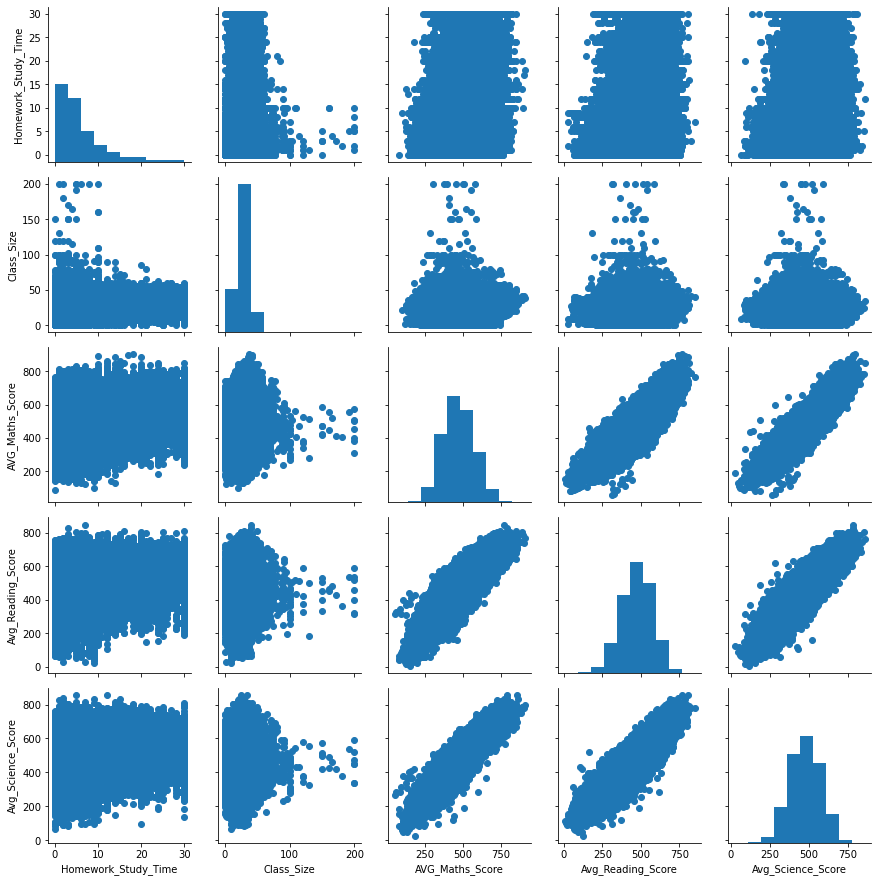

In [45]:
# Scatter plot to check the correlation between all the quantitative variables
g=sb.PairGrid(data=df_new,vars=['Homework_Study_Time','Class_Size', 'AVG_Maths_Score', 'Avg_Reading_Score', 'Avg_Science_Score'])

# Histogram plots across the diagonal
g.map_diag(plt.hist)

# Scatter plots outside the diagonal
g.map_offdiag(plt.scatter);

There are positive correlations between the reading and science scores, the reading and maths scores, and the science and maths scores. The rest of the scatter plots don't show correlations.

The homework study time and the class size are both skewed to the right, and the maths, reading and science scores have normal distribution.

#### Relationship between the birth country and the total score

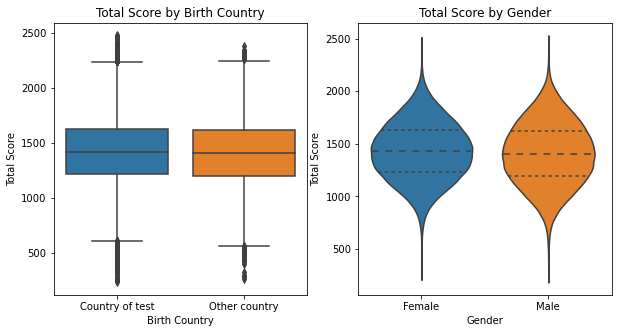

In [46]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
#Relationship between the birth country and the total score
sb.boxplot(data = df_new, x = 'Birth_Country', y = 'Total_Score');
# Set the plot's title and labels
plt.title("Total Score by Birth Country")
plt.xlabel("Birth Country")
plt.ylabel('Total Score');

plt.subplot(1,2,2)
#Relationship between gender and the total score
sb.violinplot(data = df_new, x = 'Gender', y = 'Total_Score', inner = 'quartile');
# Set the plot's title and labels
plt.title("Total Score by Gender")
plt.xlabel("Gender")
plt.ylabel('Total Score');



no significant difference in the scores based on the test given in birth country or not. Similar is the case with scores among different Genders.

#### Relationship between the number of cellphones,No_TVs,No_Computers, No_Books and the total score

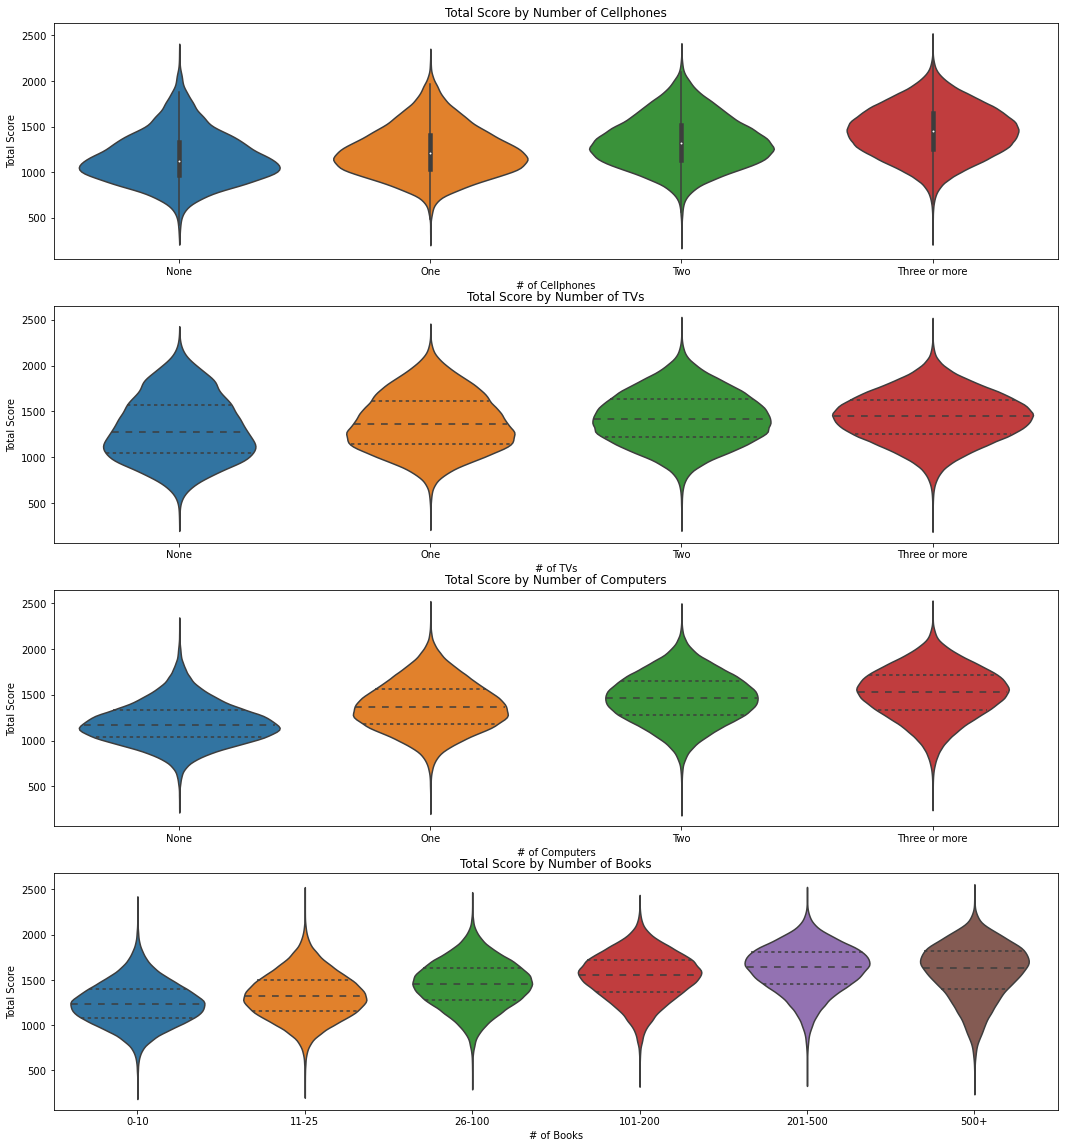

In [47]:
plt.figure(figsize=(18,20))

plt.subplot(4,1,1)
#Relationship between the number of cellphones and the total score
sb.violinplot(data = df_new, x = 'No_Cellphones', y = 'Total_Score');
# Set the plot's title and labels
plt.title("Total Score by Number of Cellphones")
plt.xlabel("# of Cellphones")
plt.ylabel('Total Score');

plt.subplot(4,1,2)
#Relationship between the number of TVs and the total score
sb.violinplot(data = df_new, x = 'No_TVs', y = 'Total_Score', inner = 'quartile');
# Set the plot's title and labels
plt.title("Total Score by Number of TVs")
plt.xlabel("# of TVs")
plt.ylabel('Total Score');

plt.subplot(4,1,3)
#Relationship between the number of computers and the total score
sb.violinplot(data = df_new, x = 'No_Computers', y = 'Total_Score', inner = 'quartile');
# Set the plot's title and labels
plt.title("Total Score by Number of Computers")
plt.xlabel("# of Computers")
plt.ylabel('Total Score');

plt.subplot(4,1,4)
sb.violinplot(data = df_new, x = 'No_Books', y = 'Total_Score', inner = 'quartile');
# Set the plot's title and labels
plt.title("Total Score by Number of Books")
plt.xlabel("# of Books")
plt.ylabel('Total Score');

#### Relationship between the homework study time and the total score

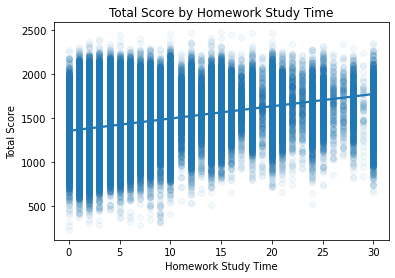

In [48]:
#Relationship between the homework study time and the total score

# Add transparency to the scatter plot to better show the trend and find outliers
sb.regplot(data = df_new, x = 'Homework_Study_Time', y = 'Total_Score', scatter_kws = {'alpha' : 1/20});

# Set the plot's title and labels
plt.title("Total Score by Homework Study Time")
plt.ylabel('Total Score')
plt.xlabel('Homework Study Time');

the higher the study time, the higher the total score mean. However, the increase of the score is not very significant in this plot.

#### Relationship between the mothers and fathers' schooling:

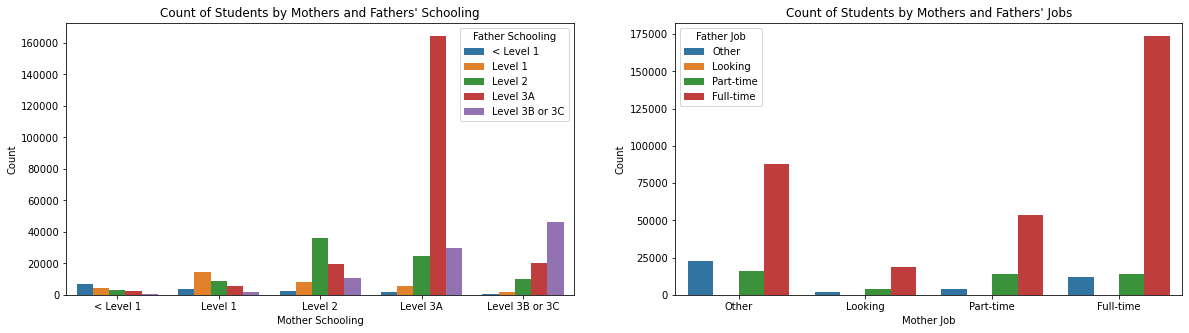

In [49]:
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
#Relationship between the mothers and fathers' schooling:
sb.countplot(data = df_new, x = 'Mother_Schooling', hue = 'Father_Schooling');
# Set the plot's title, labels and legend title
plt.title("Count of Students by Mothers and Fathers' Schooling")
plt.ylabel('Count')
plt.xlabel('Mother Schooling')
plt.legend(title = "Father Schooling");

plt.subplot(1,2,2)
sb.countplot(data = df_new, x = 'Mother_Job',hue='Father_Job');
# Set the plot's title, labels and legend title
plt.title("Count of Students by Mothers and Fathers' Jobs")
plt.ylabel('Count')
plt.xlabel('Mother Job')
plt.legend(title = "Father Job")

Majority of the students have their parents schooling as Level 3A and most of the students have both parents with full time jobs.

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

I wanted to check if there is any relationship between the numeric variables. Hence plotted pair grid to see if there are any relationships.

There are positive correlations between the reading and science scores, the reading and maths scores, and the science and maths scores. The rest of the scatter plots don't show correlations.

The homework study time and the class size are both skewed to the right, and the maths, reading and science scores have normal distribution.

After that, I tried to plot all the variables against the total score to see if there are any correlations between them and the score and got the following conclusions:

1.There was a relationship between the average total score and the following variables: number of cellphones, TVs, computers & books, the homework study time.

2.The average total score didn't change when they were plotted against  birth country.

3.Higher the study time, the higher the total score mean. However, the increase of the score is not very significant in this plot.
4.Majority of the students have their parents schooling as Level 3A and most of the students have both parents with full time jobs

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


Majority of the students have their parents schooling as Level 3A and most of the students have both parents with full time jobs

# Multivariate Exploration


My goal is here interpret total score with other factors 

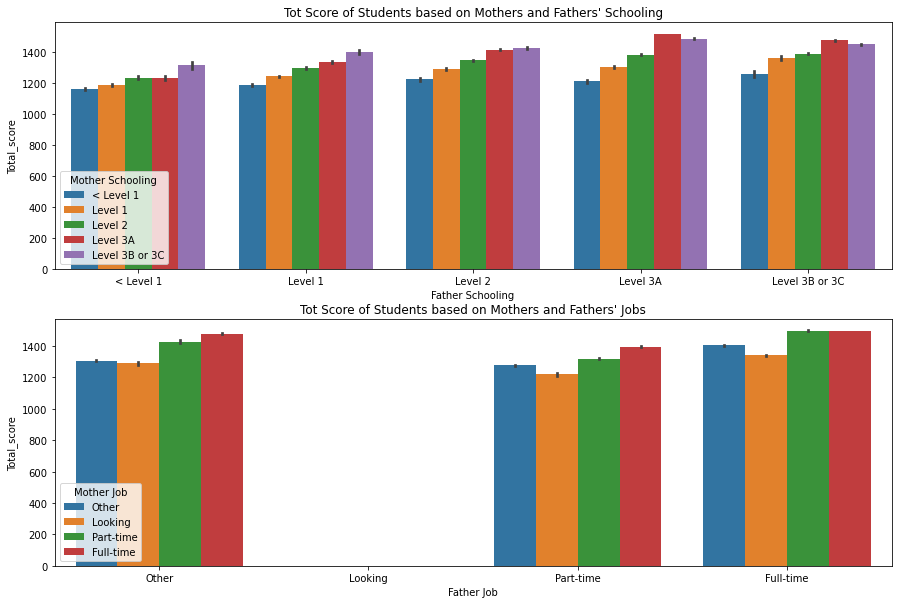

In [50]:
plt.figure(figsize=(15,10))

plt.subplot(2,1,1)
#Relationship between the mothers and fathers' schooling:
sb.barplot(data = df_new, x = 'Father_Schooling', y = 'Total_Score',hue = 'Mother_Schooling');
# Set the plot's title, labels and legend title
plt.title("Tot Score of Students based on Mothers and Fathers' Schooling")
plt.ylabel('Total_score')
plt.xlabel('Father Schooling')
plt.legend(title = "Mother Schooling");

plt.subplot(2,1,2)
sb.barplot(data = df_new, x = 'Father_Job',y = 'Total_Score',hue='Mother_Job');
# Set the plot's title, labels and legend title
plt.title("Tot Score of Students based on Mothers and Fathers' Jobs")
plt.ylabel('Total_score')
plt.xlabel('Father Job')
plt.legend(title = "Mother Job");



Scores for Students were higher with both parents with higher level of Education.(Scores with moms schooling as Level 3A and Dad Schooling as Level 3A or 3B/3C are highest).

Also Scores are higher when atleast one of the parents had full time job. There exists no case where Father is looking for a job and Mother is either working or looking or parttime. 

But the difference of scores isnt significant in both the cases.

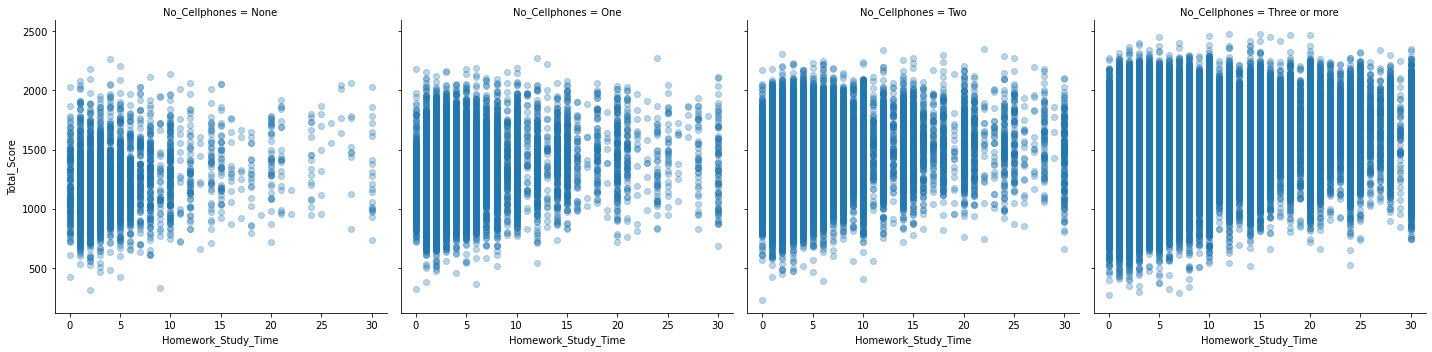

In [51]:
#Plotting the homework study time vs. the total score based on the number of cellphones

g = sb.FacetGrid(data = df_new, col = 'No_Cellphones',height=5)
g.map(plt.scatter, 'Homework_Study_Time', 'Total_Score', alpha = 0.3);


From the above plot homework study time is more in students with 3 or more cell phones which in turn improves total scores. Majority of students with only 1 or none cellphone have study time around 15 hours but for the rest study times are more.

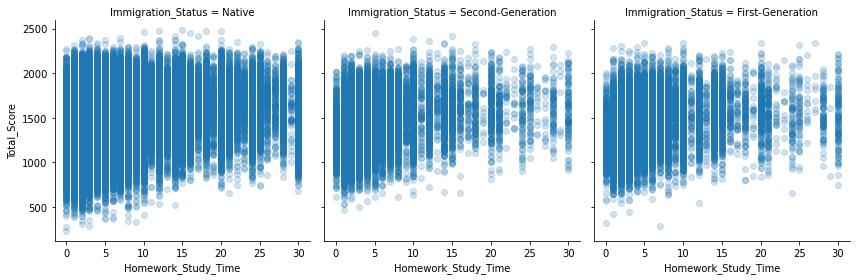

In [52]:
#Plotting the homework study time vs. the total score based on the immigration status

g = sb.FacetGrid(data = df_new, col = 'Immigration_Status', height = 4)
g.map(plt.scatter, 'Homework_Study_Time', 'Total_Score', alpha = 0.2);


There isnt much difference in the scores based on immigration status.However study time for students with native immigration status seems to be more.

(0.0, 75.0)

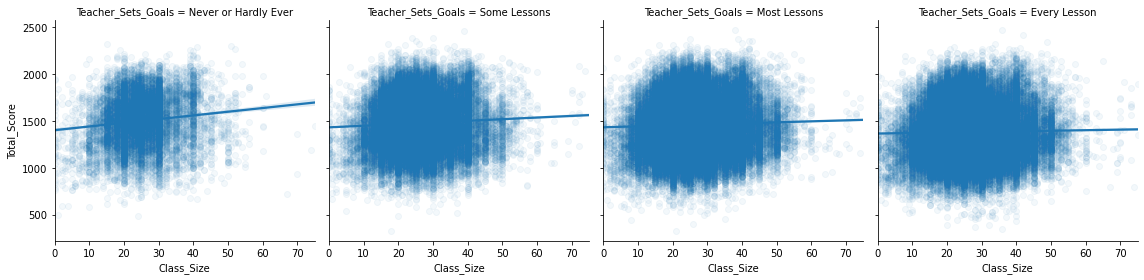

In [53]:
g = sb.FacetGrid(data = df_new, col = 'Teacher_Sets_Goals', height = 4)
g.map(sb.regplot, 'Class_Size', 'Total_Score',scatter_kws = {'alpha' : 1/20});

plt.xlim((0,75))

There isnt really any correlation between class size and total score with Teachers setting goals

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Homework study time is more in students with 3 or more cell phones which in turn improves total scores.

Also Scores are higher when atleast one of the parents had full time job.

## Were there any interesting or surprising interactions between features

I was hoping to see some relation between class size and scores in addition to teachers interference.But it isnt the case, there isnt hardly any relation between class size and total scores irrespective of teachers interference with students.

## Conclusions

My observation was that technology plays important in improving scores. Apart from that parents job status also plays an important role to improve the scores.

